### AIM :
Data Analysis on Obesity Data

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading Source File : obesity_data.csv

In [2]:
#Load Dataset
data=pd.read_csv('D:/C_Drive_Desktop/Data_Analytics_For_Business_Decision_Making/2nd_Semester/2nd_Semester/2206_Capstone_Project/Final_Dataset/obesity_data.csv')
data.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.58,71.98,23.89,4,Normal weight
1,69,Male,164.13,89.96,33.40,2,Obese
2,46,Female,168.07,72.93,25.82,4,Overweight
3,32,Male,168.46,84.89,29.91,3,Overweight
4,60,Male,183.57,69.04,20.49,3,Normal weight


## Pre-Processing

###### Converting Obese value to 1 and other values to 0 for ObesityCategory 

In [4]:
data['ObesityCategory'] = pd.Series(map(lambda x: 1 if x == 'Obese' else 0,data['ObesityCategory']))

In [19]:
data

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.58,71.98,23.89,4,0
1,69,Male,164.13,89.96,33.40,2,1
2,46,Female,168.07,72.93,25.82,4,0
3,32,Male,168.46,84.89,29.91,3,0
4,60,Male,183.57,69.04,20.49,3,0
...,...,...,...,...,...,...,...
995,18,Male,155.59,64.10,26.48,4,0
996,35,Female,165.08,97.64,35.83,1,1
997,49,Female,156.57,78.80,32.15,1,1
998,64,Male,164.19,57.98,21.51,4,0


###### Converting Male value to 1 and other values to 0 for Gender

In [3]:
data['Gender'] = pd.Series(map(lambda x: 1 if x == 'Male' else 0,data['Gender']))

In [5]:
data

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.58,71.98,23.89,4,0
1,69,1,164.13,89.96,33.40,2,1
2,46,0,168.07,72.93,25.82,4,0
3,32,1,168.46,84.89,29.91,3,0
4,60,1,183.57,69.04,20.49,3,0
...,...,...,...,...,...,...,...
995,18,1,155.59,64.10,26.48,4,0
996,35,0,165.08,97.64,35.83,1,1
997,49,0,156.57,78.80,32.15,1,1
998,64,1,164.19,57.98,21.51,4,0


## EDA

##### 5 Number Summary

In [54]:
#Show Key Statistics
data.describe()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,0.523000,170.052880,71.206370,24.888790,2.534000,0.191000
std,18.114267,0.499721,10.309884,15.509879,6.193926,1.116284,0.393286
min,18.000000,0.000000,136.120000,26.070000,8.470000,1.000000,0.000000
25%,35.000000,0.000000,163.510000,61.132500,20.920000,2.000000,0.000000
50%,50.000000,1.000000,169.800000,71.930000,24.700000,3.000000,0.000000
75%,66.000000,1.000000,177.355000,81.132500,28.730000,4.000000,0.000000
max,79.000000,1.000000,201.420000,118.910000,50.790000,4.000000,1.000000


###### 1. Checking the Split of the data in Dependent Variable

Class Split
0    809
1    191
Name: ObesityCategory, dtype: int64


Text(0, 0.5, 'Count')

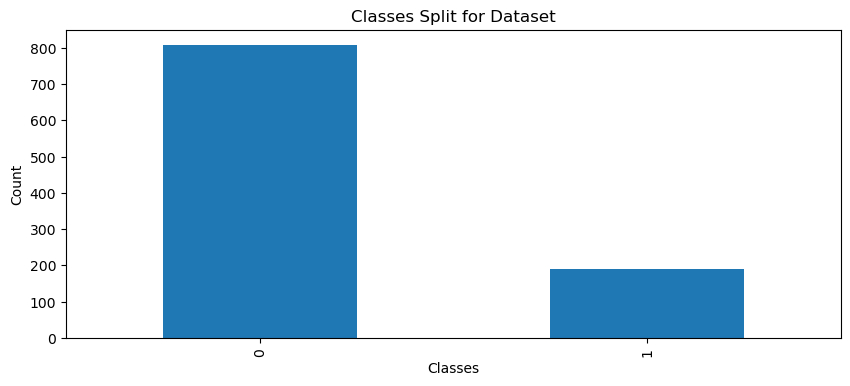

In [20]:
print('Class Split')
print(data['ObesityCategory'].value_counts())
data['ObesityCategory'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

##### Result : Significant Difference in the Count of Obese and Non-Obese records

##### 2. Checking for Outliers in Indepedent Variables using BoxPlot

<Axes: >

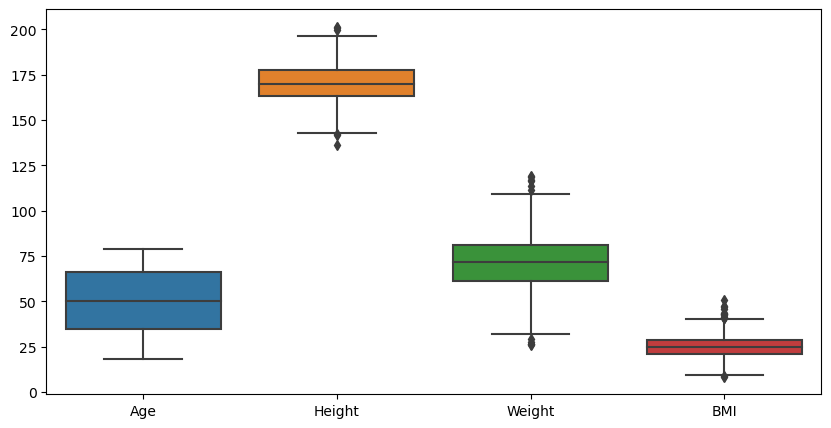

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data.loc[:,['Age','Height','Weight','BMI']])

##### Result : No Significant Outliers

##### 3. Looking for NULL Values within the columns

In [23]:
data.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

###### No Null Values

### NORMAL DISTRIBUTION CHECK

###### 4. Checking if the Data is Normally Distributed using SHAPIRO-WILK TEST and SKEWNESS, KURTOSIS for each Indepedent Variable

In [6]:
from scipy.stats import shapiro

In [36]:
stat, p = shapiro(data['Weight'])
print(f'Statistics={stat}, p={p}')

Statistics=0.997952401638031, p=0.2632651627063751


In [7]:
from scipy.stats import skew, kurtosis

In [33]:
skewness = skew(data['Weight'])
kurt = kurtosis(data['Weight'], fisher=False)  # Set fisher=False for kurtosis=3 if normal
print(f'Skewness: {skewness}, Kurtosis: {kurt}')

Skewness: -0.09057012683740871, Kurtosis: 3.028269964448696


###### Since p-value > 0.05 ; Skewness ~ 0 ; Kurtosis ~ 3, the data in Weight can be considered as Normally Distributed

In [41]:
stat, p = shapiro(data['Age'])
print(f'Statistics={stat}, p={p}')

Statistics=0.9542858004570007, p=4.237917262477833e-17


In [42]:
skewness = skew(data['Age'])
kurt = kurtosis(data['Age'], fisher=False)  # Set fisher=False for kurtosis=3 if normal
print(f'Skewness: {skewness}, Kurtosis: {kurt}')

Skewness: -0.06565655105197592, Kurtosis: 1.8378888696012097


###### Since p-value < 0.05 ; Skewness ~ 0 ; Kurtosis < 3, the data in Age cannot be considered as Normally Distributed

In [8]:
stat, p = shapiro(data['Height'])
print(f'Statistics={stat}, p={p}')

Statistics=0.9987412095069885, p=0.7161691784858704


In [9]:
skewness = skew(data['Height'])
kurt = kurtosis(data['Height'], fisher=False)  # Set fisher=False for kurtosis=3 if normal
print(f'Skewness: {skewness}, Kurtosis: {kurt}')

Skewness: 0.009367610040744576, Kurtosis: 2.9990458423701822


###### Since p-value > 0.05 ; Skewness ~ 0 ; Kurtosis ~ 3, the data in Height can be considered as Normally Distributed

In [10]:
stat, p = shapiro(data['BMI'])
print(f'Statistics={stat}, p={p}')

Statistics=0.9944427609443665, p=0.000948738947045058


In [11]:
skewness = skew(data['BMI'])
kurt = kurtosis(data['BMI'], fisher=False)  # Set fisher=False for kurtosis=3 if normal
print(f'Skewness: {skewness}, Kurtosis: {kurt}')

Skewness: 0.2525452314845174, Kurtosis: 3.4948317221549052


###### Since p-value < 0.05 ; Skewness ~ 0 ; Kurtosis > 3, the data in BMI cannot be considered as Normally Distributed

### Correlation Check

##### Checking for Correlation between Variables

In [24]:
data.corr()

C:\Users\Aditi\AppData\Local\Temp\ipykernel_14480\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
Age,1.000000,0.019647,-0.061405,-0.059981,-0.022308,-0.022719
Height,0.019647,1.000000,0.016029,-0.477091,0.030375,-0.360542
Weight,-0.061405,0.016029,1.000000,0.861441,0.063408,0.561999
BMI,-0.059981,-0.477091,0.861441,1.000000,0.038016,0.704031
PhysicalActivityLevel,-0.022308,0.030375,0.063408,0.038016,1.000000,0.018254
ObesityCategory,-0.022719,-0.360542,0.561999,0.704031,0.018254,1.000000


##### BMI and Weight are highly Positively Correlated (0.86), so does BMI and ObesityCategory (0.70) and Weight and BMI (0.56) ; Height and BMI are also Neutrally Correlated but Negatively (-0.47)

###### Checking with Scatter-Plot

<Axes: >

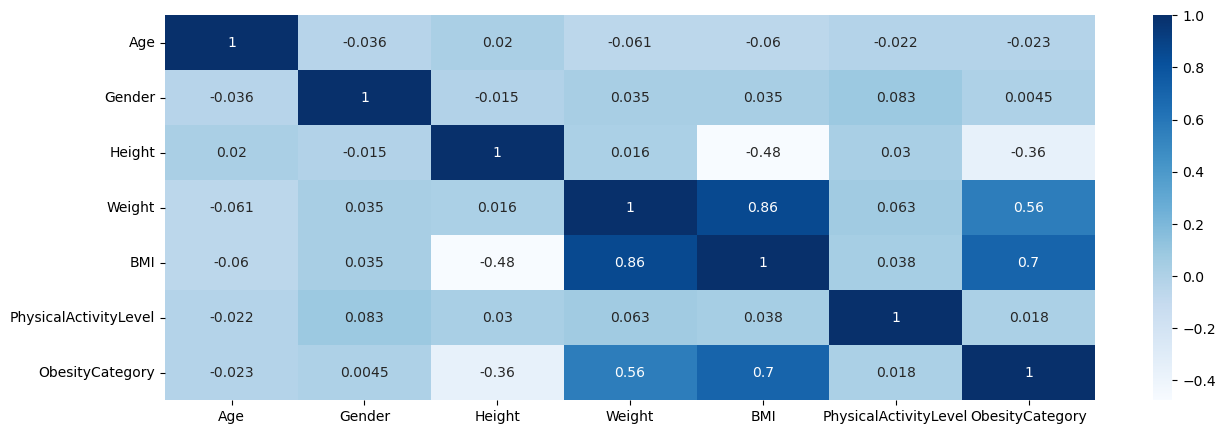

In [8]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

###### Using Pair Plot

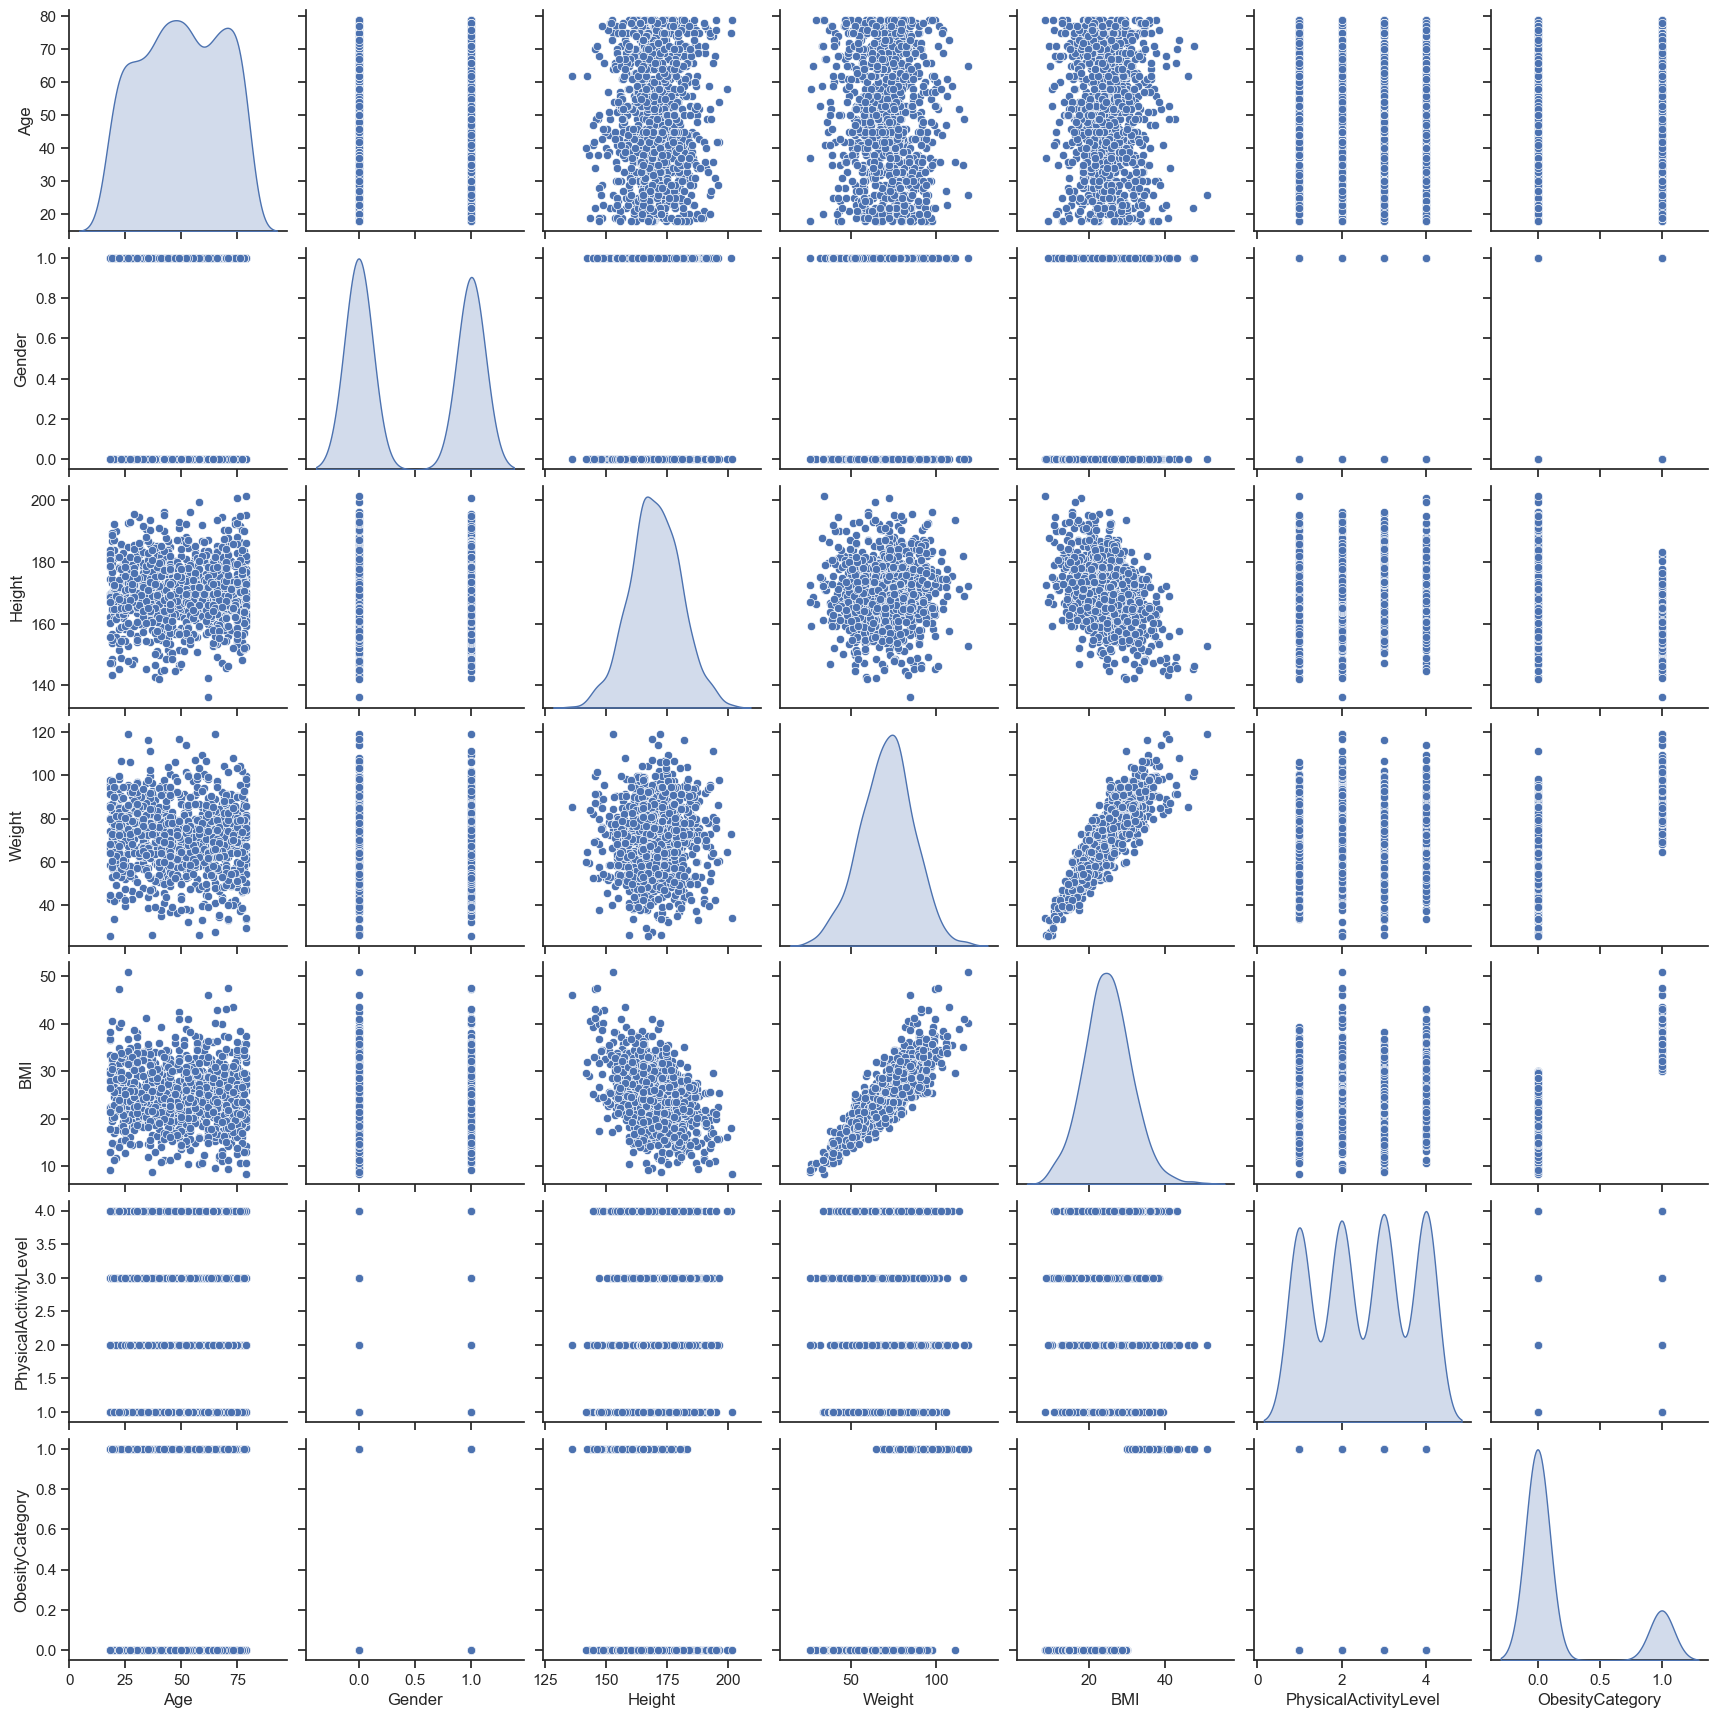

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.set(style="ticks")
sns.pairplot(data, diag_kind='kde')
plt.show()

## MODEL 1 : Logistic Regression

### Checking Assumptions of Logistic Regression Model

###### Since Logistic Regression is a Parametric Supervised Model, it has some assumption:

1. Observations to be independent of each other. – Passed – Since each record taken is of individual user data, the observations are independent of each other.

2. Little or No multicollinearity among the independent variables

3. Assumes linearity of independent variables and log odds.

4. Large Sample Size – Failed
+ Probability of least frequent Outcome / class – Probability of Obese class – 191/1000 – 0.19
+ Number of Independent Variables – 6
+ Minimum case of least frequent class – 191
+ Formula – B*C/A – 10*7 /0.33 – 6000 records
+ Our dataset – 1000 records 

###### Assumption 2 : Checking for Multi-Colinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [18]:
X = add_constant(data)

In [19]:
X.shape

(1000, 8)

In [20]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

In [21]:
print(X.dtypes)

const                    float64
Age                        int64
Gender                     int64
Height                   float64
Weight                   float64
BMI                      float64
PhysicalActivityLevel      int64
ObesityCategory            int64
dtype: object


In [22]:
calc_vif(X)

,variables,VIF
0,const,4677.743570
1,Age,1.006467
2,Gender,1.010055
3,Height,16.518824
4,Weight,50.187077
5,BMI,70.567261
6,PhysicalActivityLevel,1.012134
7,ObesityCategory,2.175689


In [23]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= []
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: 
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) 
                col_corr.append(colName) 
    return col_corr 
col=correlation(data,0.5)
print('Correlated columns @ 0.5:', col)

Correlated columns @ 0.5: [('BMI', 'Weight'), ('ObesityCategory', 'Weight'), ('ObesityCategory', 'BMI')]


###### Results : High Co-Relation between Weight and BMI ; BMI and ObesityCategory 
###### High VIF for BMI 

##### Assumption 3: Assumes linearity of independent variables and log odds

In [25]:
import statsmodels.api as sm

In [27]:
Linear_ObesityCategory = data["ObesityCategory"]

In [9]:
Linear_Age = data["Age"]

In [29]:
Linear_Height = data["Height"]
Linear_Weight = data["Weight"]
Linear_BMI = data["BMI"]

Optimization terminated successfully.
         Current function value: 0.487412
         Iterations 5


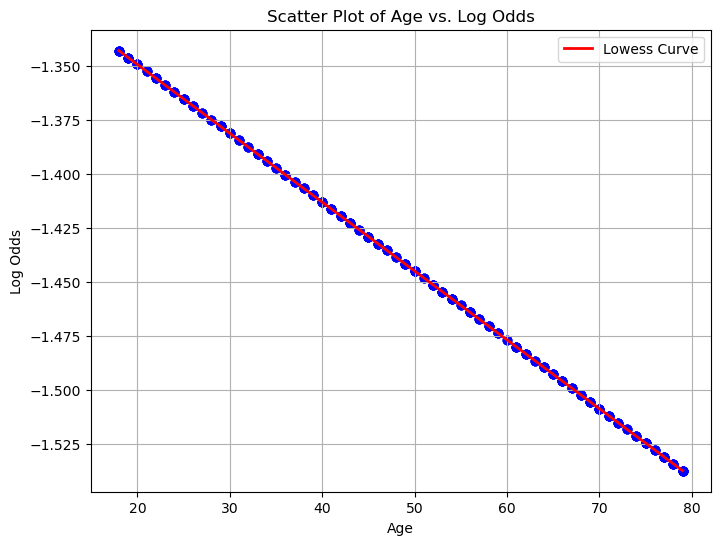

In [14]:
# Fit logistic regression model
logit_model = sm.Logit(Linear_ObesityCategory, sm.add_constant(Linear_Age))
logit_result = logit_model.fit()

# Calculate predicted probabilities
pred_probs = logit_result.predict()

# Calculate log odds
log_odds = np.log(pred_probs / (1 - pred_probs))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(Linear_Age, log_odds, color='blue', alpha=0.5)  # Scatter plot of independent variable vs. log odds
plt.title('Scatter Plot of Age vs. Log Odds')
plt.xlabel('Age')
plt.ylabel('Log Odds')
plt.grid(True)

lowess = sm.nonparametric.lowess(log_odds, Linear_Age, frac=0.3)  # Adjust frac for smoother or rougher curve
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label='Lowess Curve')
plt.legend()

plt.show()

Optimization terminated successfully.
         Current function value: 0.278276
         Iterations 8


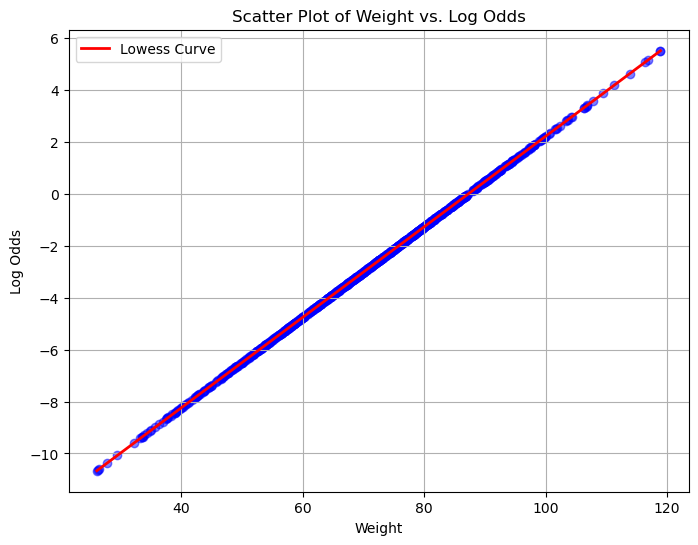

In [13]:
# Fit logistic regression model
logit_model = sm.Logit(Linear_ObesityCategory, sm.add_constant(Linear_Weight))
logit_result = logit_model.fit()

# Calculate predicted probabilities
pred_probs = logit_result.predict()

# Calculate log odds
log_odds = np.log(pred_probs / (1 - pred_probs))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(Linear_Weight, log_odds, color='blue', alpha=0.5)  # Scatter plot of independent variable vs. log odds
plt.title('Scatter Plot of Weight vs. Log Odds')
plt.xlabel('Weight')
plt.ylabel('Log Odds')
plt.grid(True)

lowess = sm.nonparametric.lowess(log_odds, Linear_Weight, frac=0.3)  # Adjust frac for smoother or rougher curve
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label='Lowess Curve')
plt.legend()

plt.show()

Optimization terminated successfully.
         Current function value: 0.417441
         Iterations 7


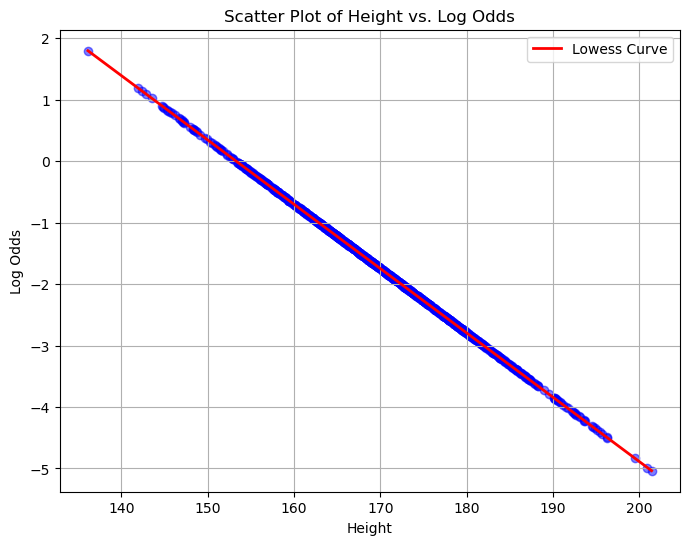

In [14]:
# Fit logistic regression model
logit_model = sm.Logit(Linear_ObesityCategory, sm.add_constant(Linear_Height))
logit_result = logit_model.fit()

# Calculate predicted probabilities
pred_probs = logit_result.predict()

# Calculate log odds
log_odds = np.log(pred_probs / (1 - pred_probs))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(Linear_Height, log_odds, color='blue', alpha=0.5)  # Scatter plot of independent variable vs. log odds
plt.title('Scatter Plot of Height vs. Log Odds')
plt.xlabel('Height')
plt.ylabel('Log Odds')
plt.grid(True)

lowess = sm.nonparametric.lowess(log_odds, Linear_Height, frac=0.3)  # Adjust frac for smoother or rougher curve
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label='Lowess Curve')
plt.legend()

plt.show()

C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Aditi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditi\AppData\Local\Temp\ipykernel_16816\1789981593.py:9: RuntimeWarning: divide by zero encountered in divide
  log_odds = np.log(pred_probs / (1 - pred_probs))
C:\Users\Aditi\AppData\Local\Temp\ipykernel_16816\1789981593.py:9: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(pred_probs / (1 - pred_probs))


         Current function value: 0.000000
         Iterations: 35


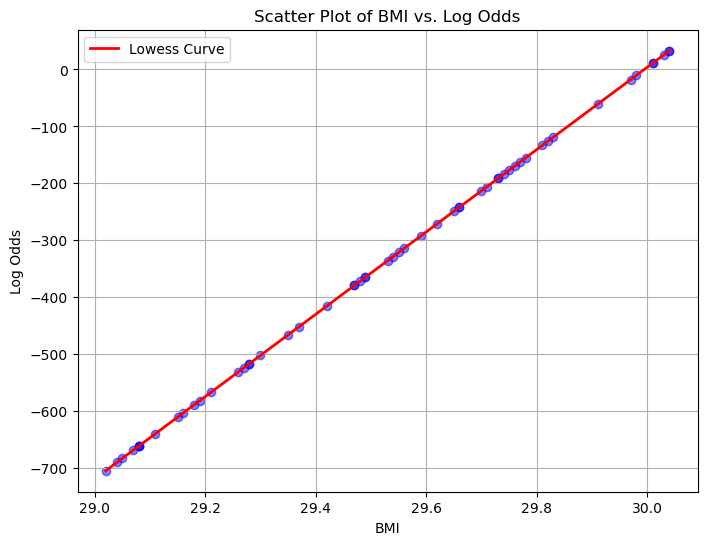

In [15]:
# Fit logistic regression model
logit_model = sm.Logit(Linear_ObesityCategory, sm.add_constant(Linear_BMI))
logit_result = logit_model.fit()

# Calculate predicted probabilities
pred_probs = logit_result.predict()

# Calculate log odds
log_odds = np.log(pred_probs / (1 - pred_probs))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(Linear_BMI, log_odds, color='blue', alpha=0.5)  # Scatter plot of independent variable vs. log odds
plt.title('Scatter Plot of BMI vs. Log Odds')
plt.xlabel('BMI')
plt.ylabel('Log Odds')
plt.grid(True)

lowess = sm.nonparametric.lowess(log_odds, Linear_BMI, frac=0.3)  # Adjust frac for smoother or rougher curve
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label='Lowess Curve')
plt.legend()

plt.show()

##### Result : Log Odd of Depedent Variable (ObesityCategory) has linear relationship with Independent variables (Age, Weight, Height,BMI)
##### Problem : Linearity of Age with Log Odd is negative (meaning with Increase Age, Obesity is Decreasing)
##### Problem : Linearity of Log Odd cannot be checked with Categorical Independent Variable like Gender , PhysicalActivityLevel 

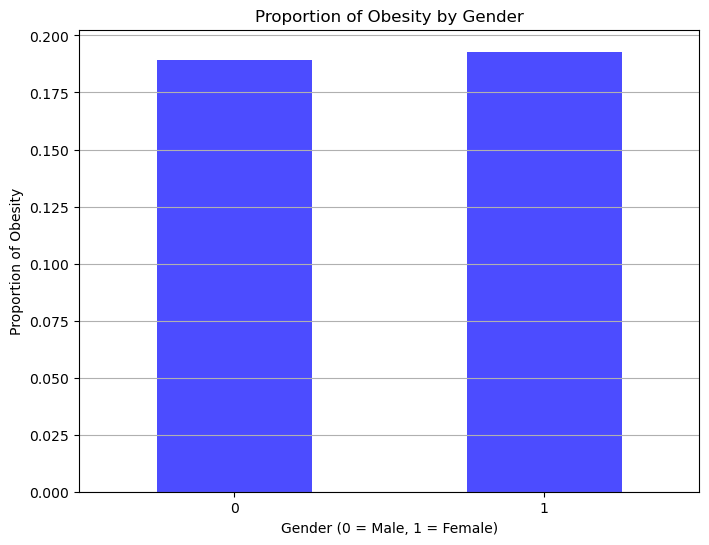

In [34]:
# Group by 'gender' and calculate the proportion of obesity for each gender
gender_obesity_proportions = data.groupby('Gender')['ObesityCategory'].mean()

# Plotting
plt.figure(figsize=(8, 6))
gender_obesity_proportions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Proportion of Obesity by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Proportion of Obesity')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y')

plt.show()

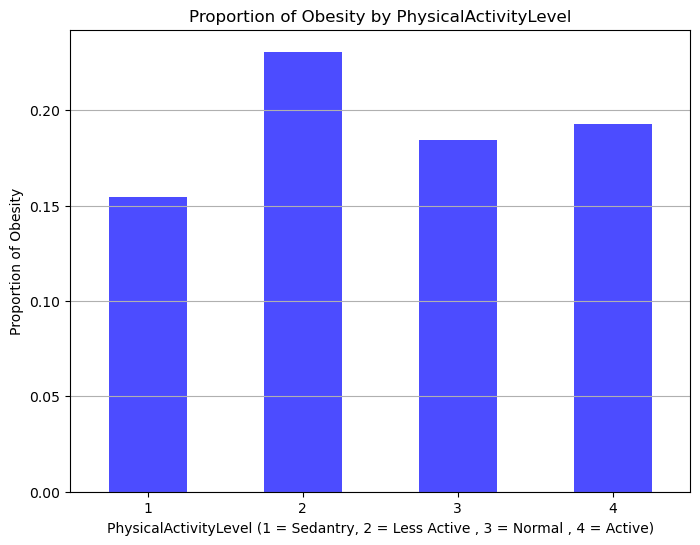

In [18]:
# Group by 'gender' and calculate the proportion of obesity for each gender
gender_obesity_proportions = data.groupby('PhysicalActivityLevel')['ObesityCategory'].mean()

# Plotting
plt.figure(figsize=(8, 6))
gender_obesity_proportions.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Proportion of Obesity by PhysicalActivityLevel')
plt.xlabel('PhysicalActivityLevel (1 = Sedantry, 2 = Less Active , 3 = Normal , 4 = Active)')
plt.ylabel('Proportion of Obesity')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y')

plt.show()

##### Result : Obese people are proportional in both the Genders
##### Problem : Obesity is inversly proportional to Physical_Activity_Level, ie More Active People is tend to be more obese


#### MODEL BUILD

In [32]:
#Model
from sklearn.linear_model import LogisticRegression

##### Preparing data for our ML Model , variable (x) has all the independent columns data and variable (Y) has the records for our dependent variable (Target). to_numpy() - We have converted these dataframes into numpy array because machine learning libraries expect input data to be in the form of Numpy Array

In [33]:
#Create x and y variables
x = data.drop('ObesityCategory', axis=1).to_numpy()
Y = data['ObesityCategory'].to_numpy()


##### Splitting of the shuffled data into Train and Test Set ;  Stratified = Y means that class distribution ( in our case,70 for each category) will remain as it is in both our training and test dataset ; random_state = 100 means that it will keep the sequence of records taken as it is (for example if it has taken row 0,2,5; next time too it will take the same row number, but records in these rows will be shuffled)

In [34]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20,stratify=Y,random_state=100)


##### StandardScaler() will scale the data in a way that mean of data will be 0 with standard deviation as 1 for each feature / independent variable. fit_transform() will calculate mean and SD for the feature, transform function will scale the value based on the formula used for standardization (X-mean)/sd 

In [35]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [36]:
#Model
from sklearn.linear_model import LogisticRegression

In [37]:
#Base Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LogReg', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: LogReg
[[161   1]
 [  2  36]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       162
           1       0.97      0.95      0.96        38

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



In [40]:
from sklearn.model_selection import learning_curve

In [41]:
def plot_learning_curves(model, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=10,
        scoring='recall_weighted',
        random_state=100
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.grid(True)
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Recall Score')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.title(title)
    plt.show()

In [42]:
# Initialize Logistic Regression model and evaluate learning curve
logreg_model = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=100, max_iter=1000)

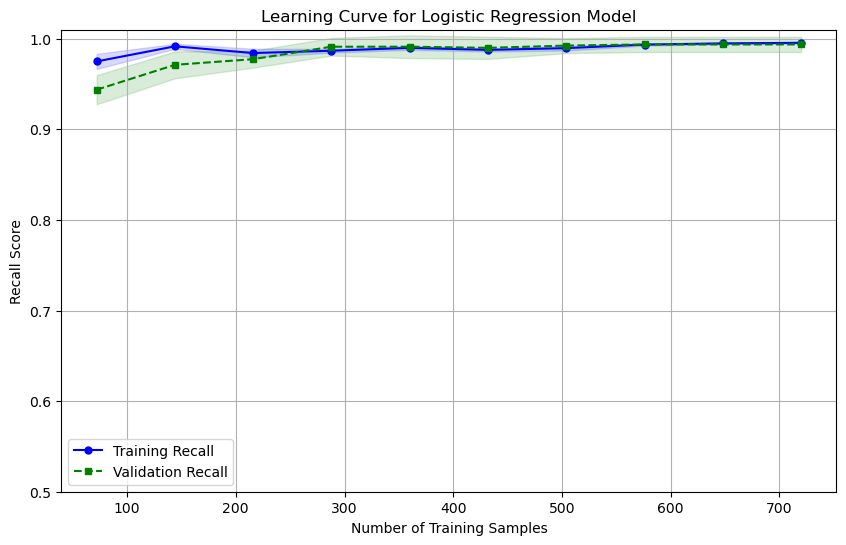

In [43]:
plot_learning_curves(logreg_model, x_train2, y_train, title="Learning Curve for Logistic Regression Model")

## Balancing the dataset using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
from collections import Counter

In [46]:
x = data.drop("ObesityCategory", axis=1)

In [47]:
y = data["ObesityCategory"]

In [48]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
x_smote, y_smote = smote.fit_resample(x, y)

# Display class distribution before and after SMOTE
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_smote))

Original dataset shape: Counter({0: 809, 1: 191})
Resampled dataset shape: Counter({0: 809, 1: 809})


In [49]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.20,stratify=y_smote,random_state=100)

In [50]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [51]:
#Model
from sklearn.linear_model import LogisticRegression

In [52]:
#Base Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LogReg', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: LogReg
[[158   4]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       162
           1       0.98      1.00      0.99       162

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



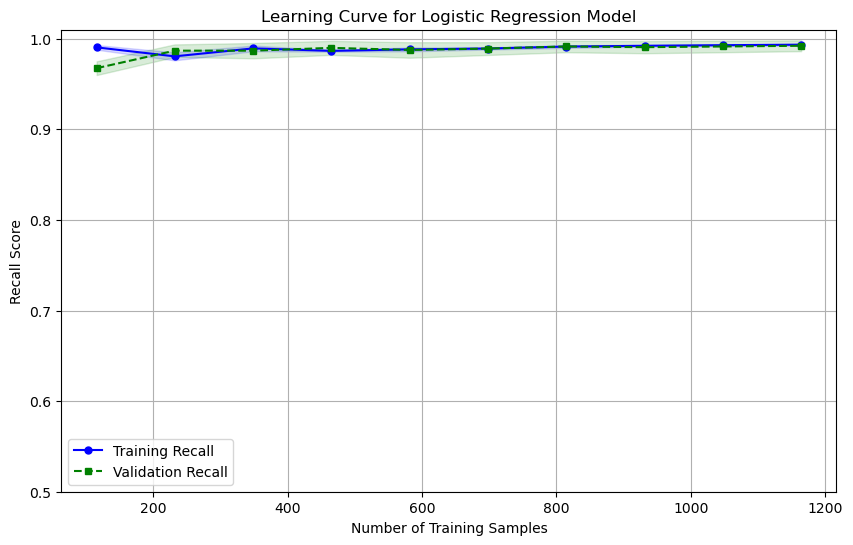

In [53]:
plot_learning_curves(logreg_model, x_train2, y_train, title="Learning Curve for Logistic Regression Model")